# Определение loss функции
* MSE (mean squared error) -  для задач регрессии
* Binary cross entropy - для задач бинарной классификации
* Categorical cross entropy - для задач многоклассовой классификации

Все они реализованы в Keras и находятся в tf.keras.losses:
* tf.keras.losses.MSE()
* tf.keras.losses.binary_crossentropy()
* tf.keras.losses.sparse_categorical_crossentrypy()

In [1]:
import tensorflow as tf
import numpy as np

2023-03-26 15:58:39.394888: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
y_true = np.random.rand(10)
y_pred = np.random.rand(10)

# loss функция принимает предсказанные значения и реальные, и возвращает хначение --
print(tf.keras.losses.MSE(y_true=y_true, y_pred=y_pred))

tf.Tensor(0.2482332602303317, shape=(), dtype=float64)


2023-03-26 16:01:14.331101: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Можно проверить, правильно ли она релизована в Keras
print(np.mean((y_true - y_pred)**2))

0.2482332602303317


In [4]:
print(tf.keras.losses.binary_crossentropy(np.ones(10), np.ones(10)))

loss = tf.keras.losses.BinaryCrossentropy()
print(loss(np.ones(10), np.ones(10)))

tf.Tensor(0.0, shape=(), dtype=float64)
tf.Tensor(0.0, shape=(), dtype=float64)


In [6]:
#tf.keras.losses.SparseCategoricalCrossentropy?

# Определение оптимизатора

С Оптимизатором все аналогично. Они живут в tf.keras.optimizers

* tf.keras.optimizers.Adam
* tf.keras.optimizers.SGD ...

Каждый из оптимизаторов имеет свои параметры, но все разделяют общий - learning rate

In [7]:
tf.keras.optimizers.Adam, tf.keras.optimizers.SGD()

(keras.optimizers.optimizer_experimental.adam.Adam,
 <keras.optimizers.optimizer_experimental.sgd.SGD at 0x12a38f520>)

# Собираем все в месте

## Задача регрессии
Рассмотрим простую задачу определения коэффициентов зависимости шкалы Фаренгейта от Цельсия. Это классическая
формулировка задачи линейной регессии. Известно, что зависимость линейная - давайте посчитаем параметры, исходя из данных:

In [9]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.11.0


In [10]:
# define dataset
celsius = np.array([-10, -40, 10, 20, 36, 5, -12, 14, 36]).astype(np.float32)
fahrenheit = np.array([14., -40., 50., 68., 96.8, 41., 10.4, 57.2, 96.8])

In [17]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

optimizer = tf.keras.optimizers.Adam(learning_rate=.5)
loss = tf.keras.losses.MSE

In [18]:
# next step modele compiling: unite model, optimizer and loss
model.compile(optimizer=optimizer, loss=loss)

fit the model
model.fit?
model.fit(x=None, y=None, batch_size=None, epochs=1, validation_data=None, shuffle=True)

Сигнатура выглядит так
* x, y - обучающая выборка, входные признаки, ответы
* batch_size - размер батча при обучении
* epochs - количество эпох
* shuffle - перемешивать данные при обучении или нет

In [22]:
history = model.fit(celsius, fahrenheit, epochs=200, verbose=2)

Epoch 1/200
1/1 - 0s - loss: 1371.6426 - 414ms/epoch - 414ms/step
Epoch 2/200
1/1 - 0s - loss: 990.0206 - 5ms/epoch - 5ms/step
Epoch 3/200
1/1 - 0s - loss: 895.0591 - 8ms/epoch - 8ms/step
Epoch 4/200
1/1 - 0s - loss: 962.0695 - 10ms/epoch - 10ms/step
Epoch 5/200
1/1 - 0s - loss: 1000.5291 - 5ms/epoch - 5ms/step
Epoch 6/200
1/1 - 0s - loss: 952.1450 - 5ms/epoch - 5ms/step
Epoch 7/200
1/1 - 0s - loss: 859.9480 - 5ms/epoch - 5ms/step
Epoch 8/200
1/1 - 0s - loss: 775.8920 - 4ms/epoch - 4ms/step
Epoch 9/200
1/1 - 0s - loss: 729.7188 - 5ms/epoch - 5ms/step
Epoch 10/200
1/1 - 0s - loss: 721.7585 - 5ms/epoch - 5ms/step
Epoch 11/200
1/1 - 0s - loss: 728.7137 - 4ms/epoch - 4ms/step
Epoch 12/200
1/1 - 0s - loss: 723.4395 - 6ms/epoch - 6ms/step
Epoch 13/200
1/1 - 0s - loss: 694.2909 - 4ms/epoch - 4ms/step
Epoch 14/200
1/1 - 0s - loss: 647.9800 - 5ms/epoch - 5ms/step
Epoch 15/200
1/1 - 0s - loss: 600.0791 - 3ms/epoch - 3ms/step
Epoch 16/200
1/1 - 0s - loss: 564.1726 - 5ms/epoch - 5ms/step
Epoch 17/

Epoch 135/200
1/1 - 0s - loss: 0.0016 - 3ms/epoch - 3ms/step
Epoch 136/200
1/1 - 0s - loss: 0.0011 - 6ms/epoch - 6ms/step
Epoch 137/200
1/1 - 0s - loss: 7.3850e-04 - 4ms/epoch - 4ms/step
Epoch 138/200
1/1 - 0s - loss: 3.4955e-04 - 6ms/epoch - 6ms/step
Epoch 139/200
1/1 - 0s - loss: 8.6334e-05 - 5ms/epoch - 5ms/step
Epoch 140/200
1/1 - 0s - loss: 3.8642e-05 - 2ms/epoch - 2ms/step
Epoch 141/200
1/1 - 0s - loss: 1.1987e-04 - 3ms/epoch - 3ms/step
Epoch 142/200
1/1 - 0s - loss: 1.8272e-04 - 6ms/epoch - 6ms/step
Epoch 143/200
1/1 - 0s - loss: 1.9811e-04 - 6ms/epoch - 6ms/step
Epoch 144/200
1/1 - 0s - loss: 2.5265e-04 - 3ms/epoch - 3ms/step
Epoch 145/200
1/1 - 0s - loss: 3.9823e-04 - 5ms/epoch - 5ms/step
Epoch 146/200
1/1 - 0s - loss: 5.7655e-04 - 3ms/epoch - 3ms/step
Epoch 147/200
1/1 - 0s - loss: 7.0520e-04 - 3ms/epoch - 3ms/step
Epoch 148/200
1/1 - 0s - loss: 7.8276e-04 - 5ms/epoch - 5ms/step
Epoch 149/200
1/1 - 0s - loss: 8.6992e-04 - 4ms/epoch - 4ms/step
Epoch 150/200
1/1 - 0s - loss: 9.

In [24]:
# Модель обучена, посмотеть итоговые коэффициенты можно командой
model.get_weights()

[array([[1.7999825]], dtype=float32), array([32.00297], dtype=float32)]

В реальности две эти шкалы связаны формулой $F = 1.8C + 32$

# История обучения

In [25]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.head()

,loss
0,1371.642578
1,990.020630
2,895.059143
3,962.069458
4,1000.529053


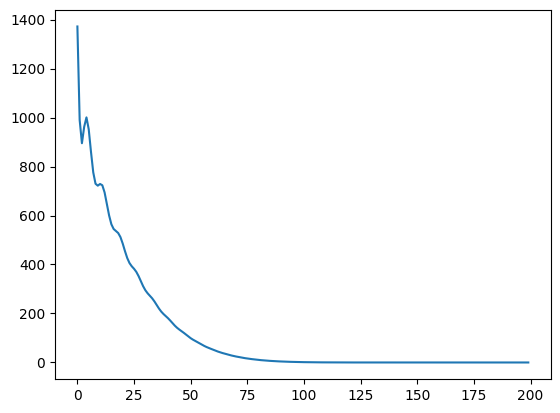

In [26]:
import matplotlib.pyplot as plt
plt.plot(history_df.loss)

# Задача классификации

In [27]:
#@title
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Normalize
from sklearn.metrics import accuracy_score


%matplotlib inline
np.random.seed(10)

colors = ['red', "blue"]
labels_cmap = ListedColormap(colors, 2)
colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # R -> W -> B
main_cmap = LinearSegmentedColormap.from_list("main_scheme", colors, N=300)

def show_data(X, y):
    plt.figure(figsize=(5, 5))
    plt.scatter(X[:, 0], X[:, 1], s=120, color=labels_cmap(y))
    

def show_descision_boundary(clf, limits, binary=False, X=None, y=None, n_lines=10, show_lines=False,
                           figsize=(5, 5), ax=None):
    xs, ys = limits
    x_min, x_max = xs
    y_min, y_max = ys
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(1, 1, 1)
    
    if binary:
        Z = clf.predict_class(np.c_[xx.ravel(), xx.ravel()])
        Z = clf.predict_class(np.c_[xx.ravel(), yy.ravel()])
        norm = Normalize(vmin=0.,vmax=1.)
    else:
        Z = clf(np.c_[xx.ravel(), xx.ravel()])
        Z = clf(np.c_[xx.ravel(), yy.ravel()])
        #if clf.prob_output:
        #    norm = Normalize(vmin=0.,vmax=1.)
        #else:
        norm = Normalize(vmin=-10.,vmax=10., clip=True)
    Z = Z.numpy() 
    Z = Z.reshape(xx.shape)
    Z = Z.astype(np.float32)
    
    ax.contourf(xx, yy, Z, n_lines, alpha=0.4, cmap=main_cmap, norm=norm)
    if show_lines:
        cp = ax.contour(xx, yy, Z, n_lines)
        ax.clabel(cp, inline=True, 
              fontsize=10, colors="green")
    
    if y is not None:
        X = np.array(X)
        y = np.array(y)
        ax.scatter(X[:, 0], X[:, 1], s=120, color=labels_cmap(y),
                   zorder=4)
        


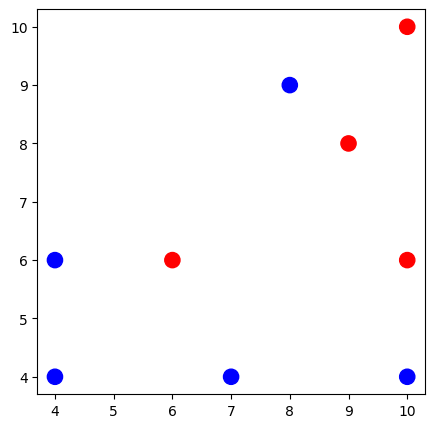

In [29]:
X = np.array([[10, 6], [7, 4], [6, 6], [9, 8], [10, 10],
             [10, 4], [4, 4], [4, 6], [8, 9]])
y = np.array([0, 1, 0, 0, 0, 1, 1, 1, 1])

show_data(X, y)

Без каких-либо сложностей, преобразуем задачу регрессии в задачу классификации, для этого нужно изменить лосс функцию и функцию активации
последнего слоя.

In [30]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(tf.keras.layers.Dense(1)) # мы хотим визуализировать логиты, поэтому без активации

optimizer = tf.keras.optimizers.Adam(learning_rate=.05)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True) # loss with logits

При компиляции модели, добавим еще одно поле - metrics. Метрики не влияют на обучение, но очень полезны для его контроля. Например на
классификатор будет удл